# Movic Reccomendation

# Data exploration

In [ ]:
# Library Importing

In [7]:
library(recommenderlab) #for recommendetion

In [2]:
library(reshape2)

In [5]:
library(data.table)

In [6]:
library(ggplot2) #for visualization

In [5]:
# Retriverving the data

In [40]:
movie_data<-read.csv("C:/Users/user/Downloads/movies.txt",stringsAsFactors=FALSE)

In [41]:
rating_data<-read.csv("C:/Users/user/Downloads/ratings.txt")

In [42]:
#Structure
str(movie_data)
str(rating_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...
'data.frame':	105339 obs. of  4 variables:
 $ userId   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ movieId  : int  16 24 32 47 50 110 150 161 165 204 ...
 $ rating   : num  4 1.5 4 4 4 4 3 4 3 0.5 ...
 $ timestamp: int  1217897793 1217895807 1217896246 1217896556 1217896523 1217896150 1217895940 1217897864 1217897135 1217895786 ...


In [9]:
#View

In [43]:
head(movie_data)

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


In [11]:
head(rating_data)

userId,movieId,rating,timestamp
1,16,4.0,1217897793
1,24,1.5,1217895807
1,32,4.0,1217896246
1,47,4.0,1217896556
1,50,4.0,1217896523
1,110,4.0,1217896150


In [44]:
#summary
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [13]:
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

# genere manupulation

In [45]:
movie_genre=as.data.frame(movie_data$genres,stringsAsFactors=FALSE)

In [46]:
movie_genre2=as.data.frame(tstrsplit(movie_genre[,1],"[|]",type.convert=TRUE),stringAsFactor=FALSE)

In [47]:
colnames(movie_genre2)<-c(1:10)

In [48]:
list_genre<-c("Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy",
              "Flim-Noir","Horror","Musical","Mystrey","Romance","Sci-Fi","Thriller","War","Western")

In [49]:
genre_matl=matrix(0,10330,18)
genre_matl[1,]<-list_genre
colnames(genre_matl)<-list_genre
for(index in 1:nrow(movie_genre2)){
    for(col in 1:ncol(movie_genre2)){
        gen_col=which(genre_matl[1,]==movie_genre2[index,col])
        genre_matl[index+1,gen_col]<-1
    }
}
genre_mat2<-as.data.frame(genre_matl[-1,],stringsAsFactors=FALSE)
for(col in 1:ncol(genre_mat2)){
    genre_mat2[,col]<-as.integer(genre_mat2[,col])
}
str(genre_mat2)

'data.frame':	10329 obs. of  18 variables:
 $ Action     : int  0 0 0 0 0 1 0 0 1 1 ...
 $ Adventure  : int  1 1 0 0 0 0 0 1 0 1 ...
 $ Animation  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Children   : int  1 1 0 0 0 0 0 1 0 0 ...
 $ Comedy     : int  1 0 1 1 1 0 1 0 0 0 ...
 $ Crime      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Fantasy    : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Flim-Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mystrey    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 1 0 0 1 0 0 0 ...
 $ Sci-Fi     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Thriller   : int  0 0 0 0 0 1 0 0 0 1 ...
 $ War        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Western    : int  0 0 0 0 0 0 0 0 0 0 ...


In [22]:
#create a search matrix that gives the films based on genres

In [50]:
searchMovie<-cbind(movie_data[,1:2],genre_mat2[])
head(searchMovie)

movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Flim-Noir,Horror,Musical,Mystrey,Romance,Sci-Fi,Thriller,War,Western
1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
#many movic has several genre
# making Sparse matrix for reccomendation

In [51]:
ratingMatrix=dcast(rating_data,userId~movieId,value.var="rating",na.rm=FALSE,)
ratingMatrix=as.matrix(ratingMatrix[,-1]) #no need for user id
#converting rating matrix into a recommenadation lab sparise matrix
ratingMatrix=as(ratingMatrix,"realRatingMatrix")
#recommendation model
recommendation_model=recommenderRegistry$get_entries(dataYype="realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"         "HYBRID_binaryRatingMatrix"      
 [3] "ALS_realRatingMatrix"            "ALS_implicit_realRatingMatrix"  
 [5] "ALS_implicit_binaryRatingMatrix" "AR_binaryRatingMatrix"          
 [7] "IBCF_binaryRatingMatrix"         "IBCF_realRatingMatrix"          
 [9] "LIBMF_realRatingMatrix"          "POPULAR_binaryRatingMatrix"     
[11] "POPULAR_realRatingMatrix"        "RANDOM_realRatingMatrix"        
[13] "RANDOM_binaryRatingMatrix"       "RERECOMMEND_realRatingMatrix"   
[15] "RERECOMMEND_binaryRatingMatrix"  "SVD_realRatingMatrix"           
[17] "SVDF_realRatingMatrix"           "UBCF_binaryRatingMatrix"        
[19] "UBCF_realRatingMatrix"

In [52]:
lapply(recommendation_model,"[[","description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$HYBRID_binaryRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_binaryRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$AR_binaryRatingMatrix
[1] "Recommender based on association rules."

$IBCF_binaryRatingMatrix
[1] "Recommender based on item-based collaborative filtering (binary rating data)."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_binaryRatingMatrix
[1] "Recommender based on item popularity."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RANDOM_binaryRatingMatrix
[1] "Produce random recommendations (binary ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$RERECOMMEND_binaryRatingMatrix
[1] "Re-recommends items (binary ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_binaryRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [53]:
# we will use item based collaborative filtering

In [54]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [55]:
#lets caheck similarity

In [56]:
similarity_mat=similarity(ratingMatrix[1:4,],method="cosine",which="users")
as.matrix(similarity_mat)


1,2,3,4
0.0000000,0.9760860,0.9641723,0.9914398
0.9760860,0.0000000,0.9925732,0.9374253
0.9641723,0.9925732,0.0000000,0.9888968
0.9914398,0.9374253,0.9888968,0.0000000


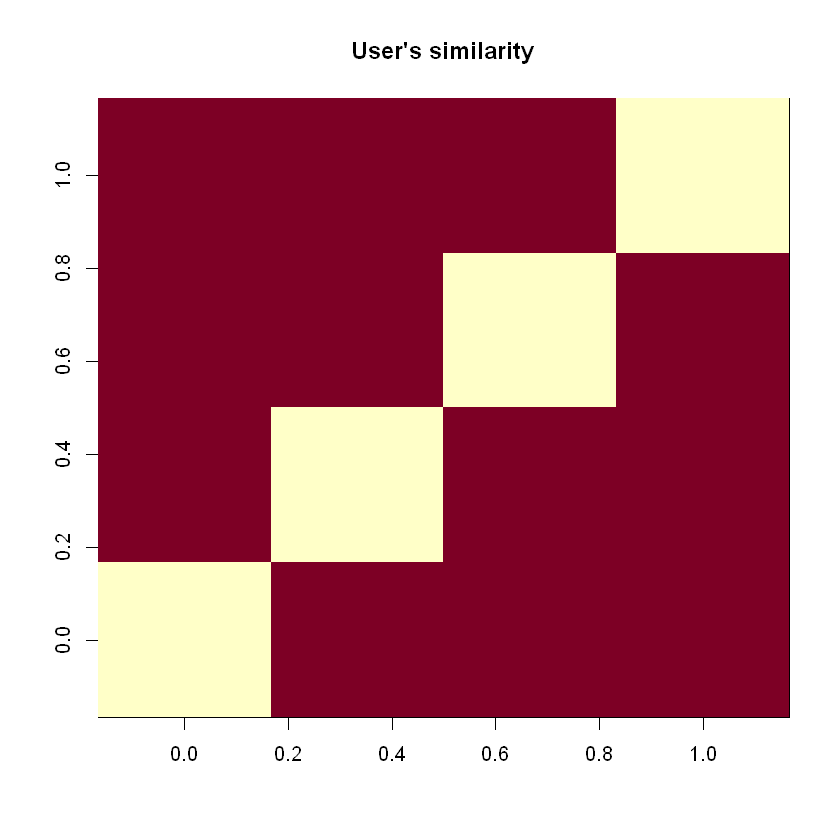

In [57]:
image(as.matrix(similarity_mat),main="User's similarity")

1,2,3,4
0.0000000,0.9669732,0.9559341,0.9101276
0.9669732,0.0000000,0.9658757,0.9412416
0.9559341,0.9658757,0.0000000,0.9864877
0.9101276,0.9412416,0.9864877,0.0000000


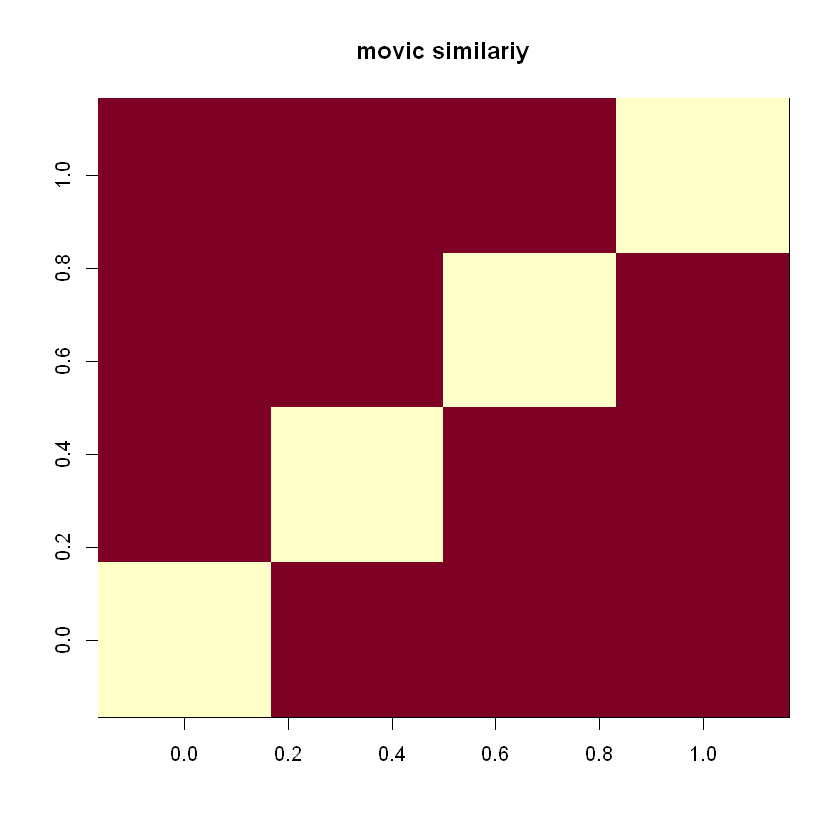

In [58]:
#movic similarity
movic_similarity=similarity(ratingMatrix[,1:4],method="cosine",which="items")
as.matrix(movic_similarity)
image(as.matrix(movic_similarity),main="movic similariy")

In [62]:
#rating values
rating_values<-as.vector(ratingMatrix@data)
unique(rating_values)
#how much rating as count if numbers
Table_rating=table(rating_values)
Table_rating

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

In [65]:
#most viewed movies visualization
movie_views<-colCounts(ratingMatrix)#count views for each movic
table_views<-data.frame(movie=names(movie_views),views=movie_views)#create dataframe of views
table_views<-table_views[order(table_views$views,decreasing=TRUE),]#sort by number of views
table_views$title<-NA
for(index in 1:10325){
    table_views[index,3]<-as.character(subset(movie_data,movie_data$movieId==table_views[index,1])$title)
}

In [66]:
table_views[1:6,]

,movie,views,title
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


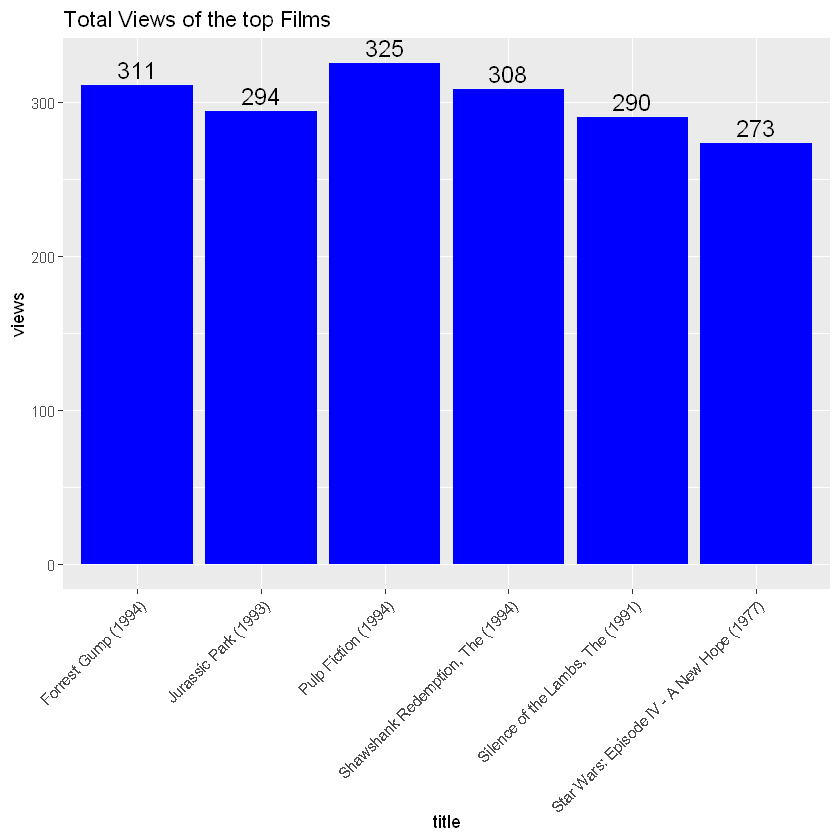

In [75]:
# plotting the data
ggplot(table_views[1:6,],aes(x=title,y=views))+geom_bar(stat="identity",fill="blue")+geom_text(aes(label=views),vjust=-0.4,size=5)+theme(axis.text.x=element_text(angle=45,hjust=1))+ggtitle("Total Views of the top Films")


In [ ]:
# Heatmap of rating matrix

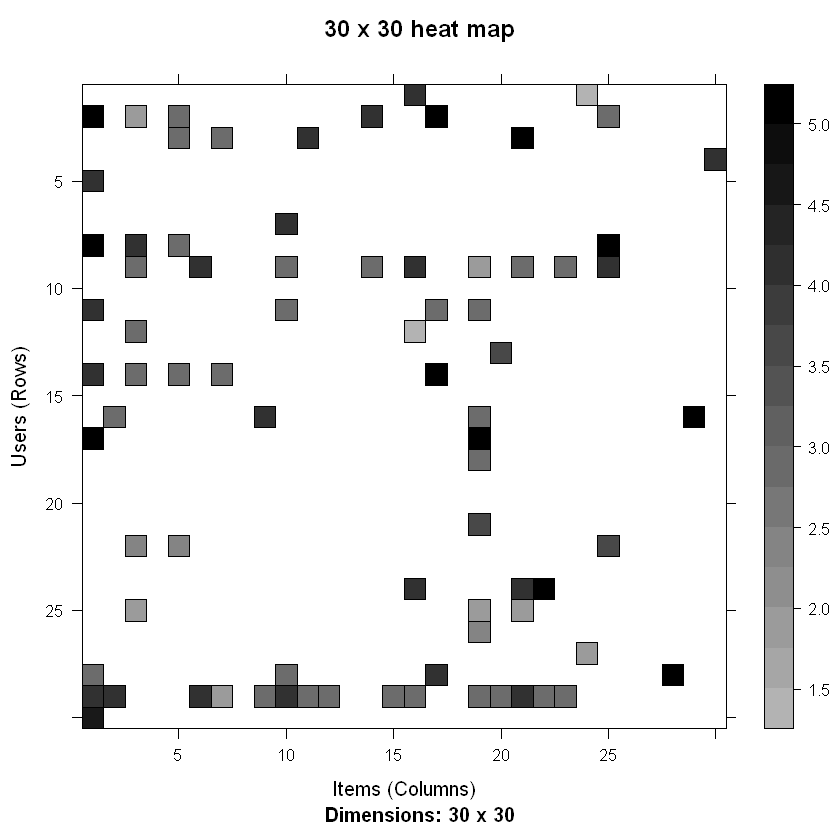

In [76]:
image(ratingMatrix[1:30,1:30],axes=FALSE,main="30 x 30 heat map")

In [ ]:
# lots of sparse data now we will
#1.select useful data
#2.normalize it
#3.binarize it
#we have seen the rating dataset. Lets sat at least 50 users needs to rate a movic so then we can say a raing is valid

In [95]:
movie_rating<-ratingMatrix[rowCounts(ratingMatrix)>50,colCounts(ratingMatrix)>50]

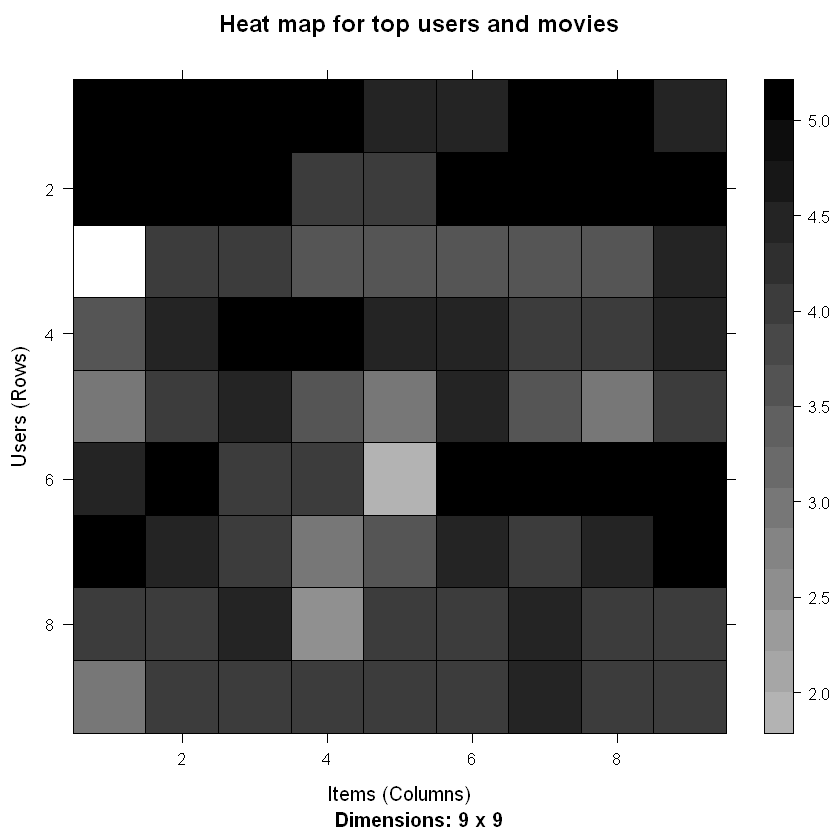

In [96]:
#this is a heat map of top users and movies
minimum_movies=quantile(rowCounts(movie_rating),0.98)
minimum_users=quantile(colCounts(movie_rating),0.98)
image(movie_rating[rowCounts(movie_rating)>minimum_movies,
                  colCounts(movie_rating)>minimum_users],main="Heat map for top users and movies")

In [97]:
#distribution of average rating per user

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



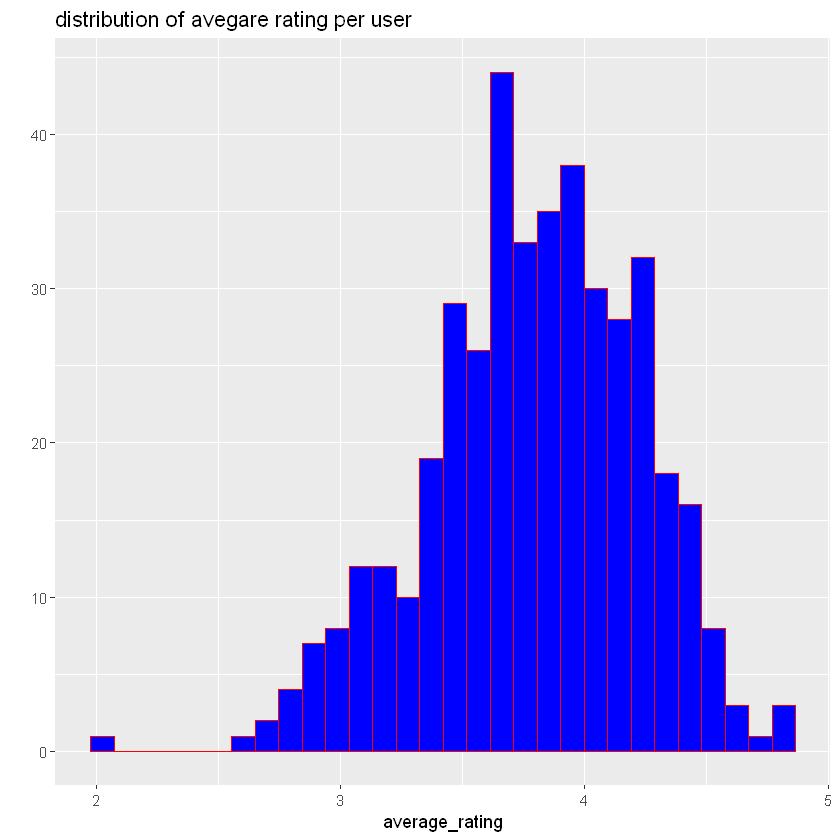

In [98]:
average_rating<-rowMeans(movie_rating)
qplot(average_rating,fill=I("Blue"),col=I("red"))+ggtitle("distribution of avegare rating per user")

In [99]:
#normalize data

In [100]:
normalized_rating=normalize(movie_rating)


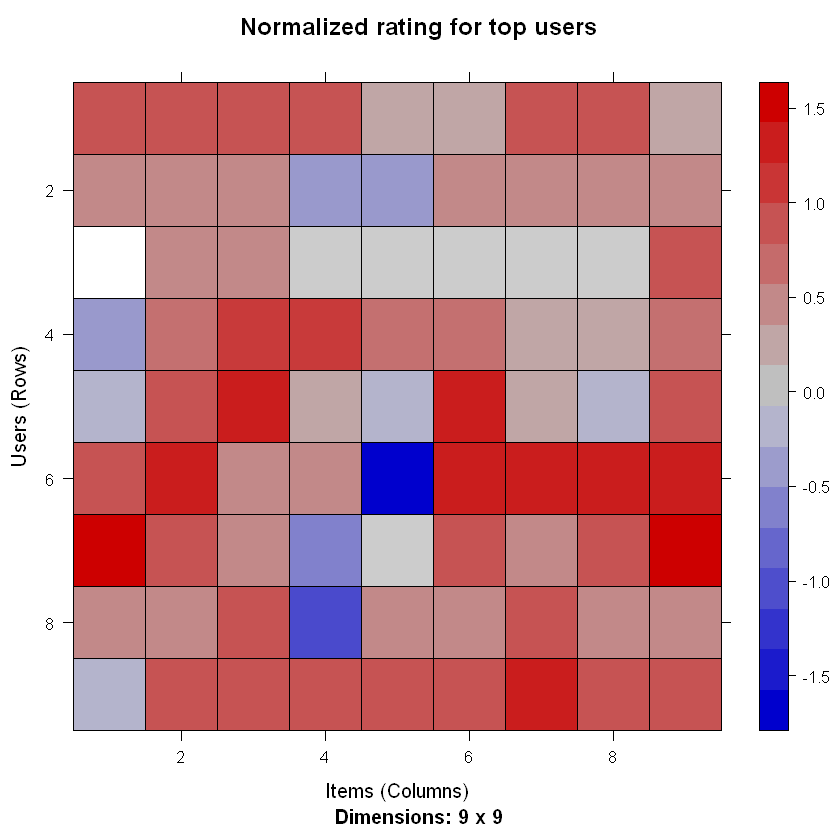

In [101]:
image(normalized_rating[rowCounts(normalized_rating)>minimum_movies,
                       colCounts(normalized_rating)>minimum_users],main="Normalized rating for top users")

In [ ]:
#binary means 0 and 1 we will recomend if rating is more than 3.5

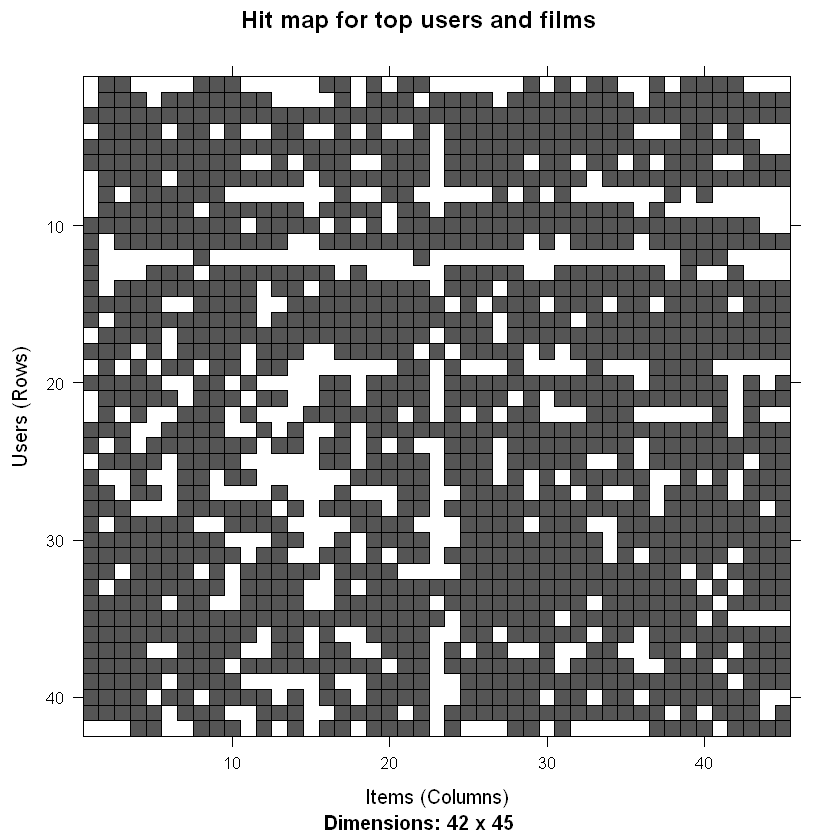

In [103]:
binary_minimum_movies<-quantile(rowCounts(movie_rating),0.90)
binary_minimum_users<-quantile(colCounts(movie_rating),0.90)
movies_watched<-binarize(movie_rating,minRating=1)
good_rated_films<-binarize(movie_rating,minRating=3.5)
image(good_rated_films[rowCounts(movie_rating)>binary_minimum_movies,
                colCounts(movie_rating)>binary_minimum_users],main="Hit map for top users and films")

# collaborative filtering system

In [105]:
sample_data<-sample(x=c(TRUE,FALSE),size=nrow(movie_rating),replace=TRUE,prob=c(0.8,0.2))
training_data=movie_rating[sample_data,]
testing_data=movie_rating[!sample_data,]

# recommendation system

In [106]:
recommendation_system<-recommenderRegistry$get_entries(datatype="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [107]:
recommen_model=Recommender(data=training_data,method="IBCF",parameter=list(k=30))
recommen_model

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 341 users.

In [108]:
class(recommen_model)

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

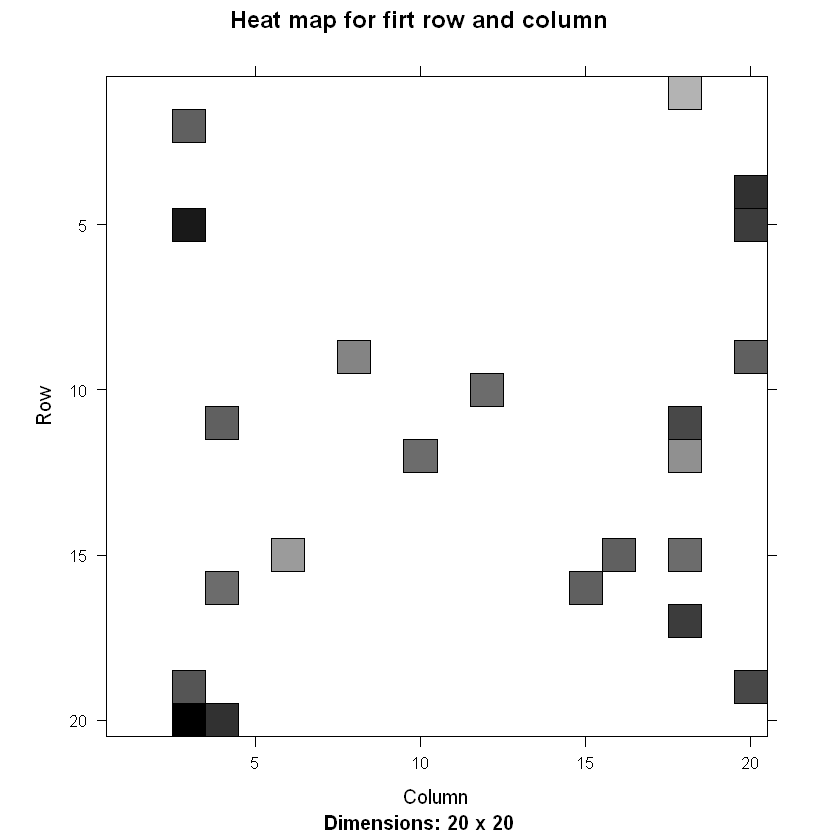

In [114]:
info=getModel(recommen_model)
top_items=20
image(info$sim[1:top_items,1:top_items],main="Heat map for firt row and column")

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



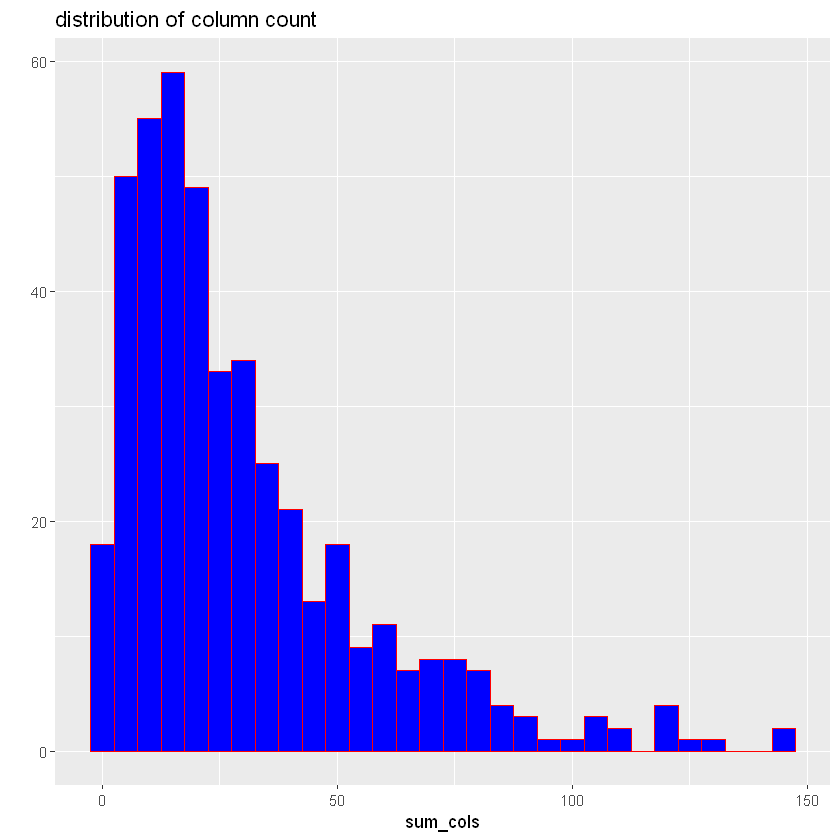

In [116]:
#we will carery out the sum of rows and columns with the similarity of the objects above 0
sum_rows=rowSums(info$sim>0)
table(sum_rows)
sum_cols=colSums(info$sim>0)
qplot(sum_cols,fill=I("blue"),col=I("red"))+ggtitle("distribution of column count")

In [ ]:
# Now lets recommend

In [126]:
top_recommendations<-10 #the number of items to recommend each user
predicted_recommendations<-predict(object=recommen_model,newdata=testing_data,n=top_recommendations)
predicted_recommendations

Recommendations as 'topNList' with n = 10 for 79 users. 

In [127]:
#lets see some of the names

In [128]:
user1<-predicted_recommendations@items[[1]] #recommendation for first user
movies_user1=predicted_recommendations@itemLabels[user1]
for(index in 1:10)
    {
        movies_user1[index]<-as.character(subset(movie_data,movie_data$movieId==movies_user1[index])$title)
    }
movies_user1

[1] "Leaving Las Vegas (1995)"                                                   
 [2] "Wallace & Gromit: The Wrong Trousers (1993)"                                
 [3] "Army of Darkness (1993)"                                                    
 [4] "Wizard of Oz, The (1939)"                                                   
 [5] "City Slickers II: The Legend of Curly's Gold (1994)"                        
 [6] "Blair Witch Project, The (1999)"                                            
 [7] "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)"
 [8] "Deer Hunter, The (1978)"                                                    
 [9] "Airplane! (1980)"                                                           
[10] "Waterworld (1995)"

# RECOMMENDATION MATRIX

In [133]:
recommendation_matrix=sapply(predicted_recommendations@items,function(x){as.integer(colnames(movie_rating)[x])})
# matrix with the recommendation for each user
recommendation_matrix[,1:4]

25,1,5,434
1148,5,141,969
1215,6,236,2947
919,16,288,1729
432,34,300,2599
2710,39,316,2294
750,48,357,3751
1263,185,432,1148
2791,261,442,3255
208,337,509,235


In [135]:
data.frame(recommendation_matrix[]) #X79 here all 79 users

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79
25,1,5,434,21,19,1262,2797,2080,150,...,153,223,1242,158,494,543,2987,47,10,3
1148,5,141,969,551,21,2692,435,661,163,...,165,1320,1721,266,1285,6016,265,141,32,5
1215,6,236,2947,5010,112,3471,2268,1127,364,...,3448,2395,2011,288,1517,6365,3176,485,36,44
919,16,288,1729,586,151,3671,539,1339,1500,...,653,3255,3176,552,1721,1552,5,541,62,50
432,34,300,2599,2804,158,4993,4022,261,1674,...,4720,7143,5952,589,2701,1265,4011,551,231,163
2710,39,316,2294,2424,165,69122,802,3176,2011,...,485,1249,7153,1219,48394,8636,1584,553,261,168
750,48,357,3751,494,208,293,497,1517,2291,...,435,5378,8368,1258,48,3948,2985,588,265,172
1263,185,432,1148,3033,231,158,1676,1639,2985,...,555,2542,59315,1282,648,1544,1923,1047,266,329
2791,261,442,3255,2761,292,1282,2001,34,3481,...,1214,969,1028,1356,508,5,2572,1343,316,349
208,337,509,235,1396,293,6711,786,440,6539,...,2115,1247,596,1387,1201,474,153,1375,337,353
